### **IMAGE PREPROCESSING**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


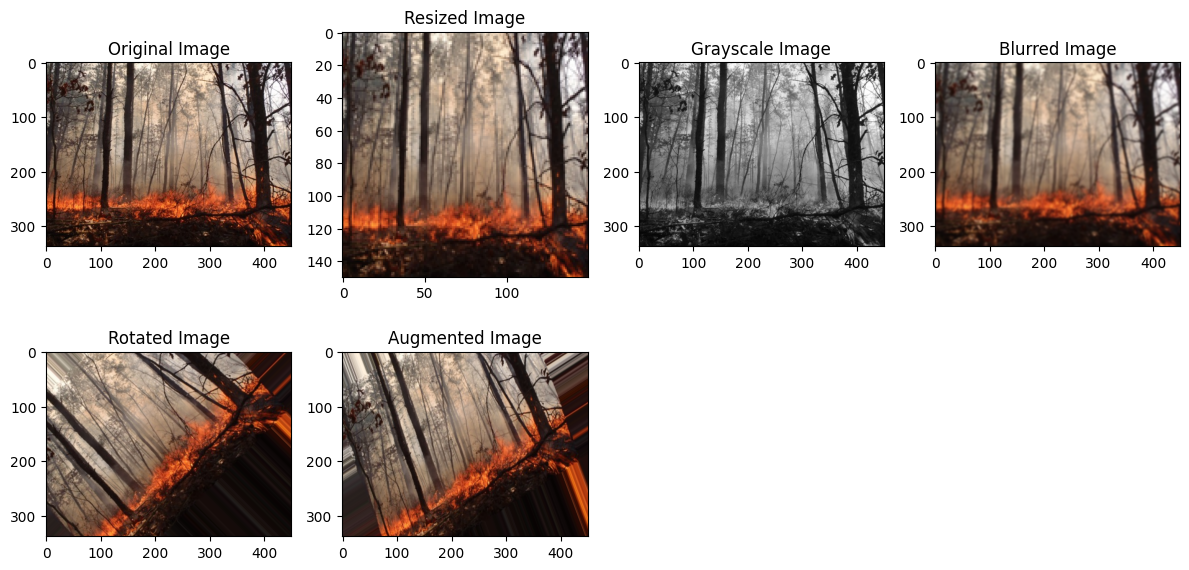

In [13]:
from google.colab import drive
drive.mount('/content/drive')

import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img, ImageDataGenerator
import matplotlib.pyplot as plt
import cv2
import numpy as np


dataset_path = dataset_path = '/content/drive/My Drive/archive/fire_dataset/fire_images'

image_files = [f for f in os.listdir(dataset_path) if f.endswith(('.jpg', '.png', '.jpeg'))]


datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

def preprocess_and_visualize(image_path):

    original_image = load_img(image_path)
    original_array = img_to_array(original_image)

    plt.figure(figsize=(12, 6))
    plt.subplot(2, 4, 1)
    plt.imshow(original_image)
    plt.title("Original Image")

    #1. Resized Image
    resized_image = original_image.resize((150, 150))
    plt.subplot(2, 4, 2)
    plt.imshow(resized_image)
    plt.title("Resized Image")

    # 2. Grayscale Image
    grayscale_image = cv2.cvtColor(np.array(original_image), cv2.COLOR_RGB2GRAY)
    plt.subplot(2, 4, 3)
    plt.imshow(grayscale_image, cmap='gray')
    plt.title("Grayscale Image")

    # 3. Blurred Image
    blurred_image = cv2.GaussianBlur(np.array(original_image), (9, 9), 0)
    plt.subplot(2, 4, 4)
    plt.imshow(blurred_image)
    plt.title("Blurred Image")

    # 4. Rotated Image
    rotated_image = datagen.apply_transform(original_array, {'theta': 45})  # Rotate by 45 degrees
    plt.subplot(2, 4, 5)
    plt.imshow(array_to_img(rotated_image))
    plt.title("Rotated Image")

    # 5. Augmented Image with datagen
    augmented_image = next(datagen.flow(np.expand_dims(original_array, 0), batch_size=1))[0]
    plt.subplot(2, 4, 6)
    plt.imshow(array_to_img(augmented_image))
    plt.title("Augmented Image")

    plt.tight_layout()
    plt.show()



In [16]:

dataset_path = '/content/drive/My Drive/archive/fire_dataset'


train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Set aside 20% of data for validation
)
  # Training Set
train_data = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

 # Validation set
val_data = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 800 images belonging to 2 classes.
Found 199 images belonging to 2 classes.


## MODEL 1 (CNN) Convolutional Neural **Networks**

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


model = Sequential([
    # First Convolutional Layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    # Second Convolutional Layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Third Convolutional Layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),


    Flatten(),


    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')


model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    validation_steps=val_data.samples // val_data.batch_size
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 284s 9s/step - accuracy: 0.7391 - loss: 0.5193 - val_accuracy: 0.9479 - val_loss: 0.1790
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8571 - val_loss: 0.5223
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.9029 - loss: 0.2738 - val_accuracy: 0.9271 - val_loss: 0.2332
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0770
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.9496 - loss: 0.1429 - val_accuracy: 0.9323 - val_loss: 0.2529
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0372
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9639 - loss: 0.1145 - val_accuracy: 0.9531 - val_loss: 0.1488
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0255
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.9518 - loss: 0.1107 - val_accu

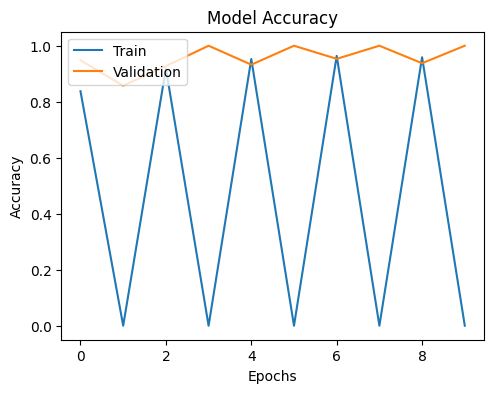

In [19]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

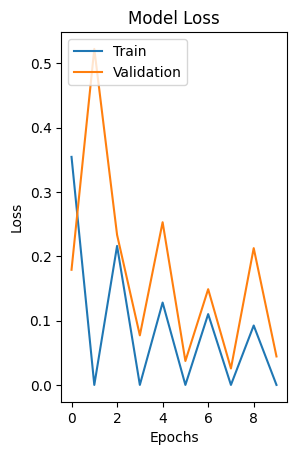

In [20]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 958ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
Confusion Matrix:
[[120  31]
 [ 37  11]]


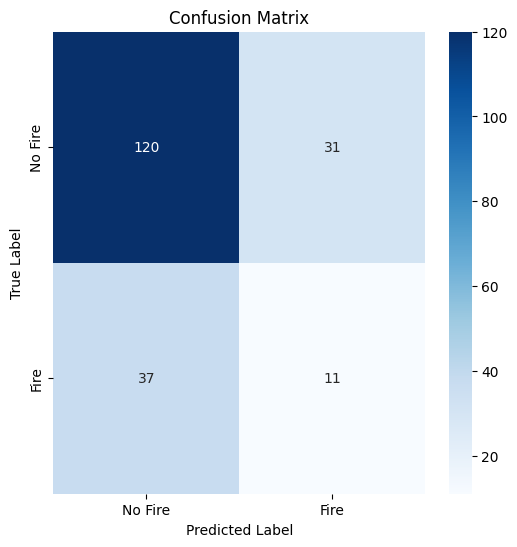

Classification Report:
              precision    recall  f1-score   support

     No Fire       0.76      0.79      0.78       151
        Fire       0.26      0.23      0.24        48

    accuracy                           0.66       199
   macro avg       0.51      0.51      0.51       199
weighted avg       0.64      0.66      0.65       199



In [26]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

true_labels = val_data.classes


predicted_labels = []

for batch in val_data:
    batch_preds = model.predict(batch[0])
    predicted_labels.extend((batch_preds > 0.5).astype("int32").flatten())


    if len(predicted_labels) >= len(true_labels):
        break


assert len(true_labels) == len(predicted_labels), f"Mismatch: {len(true_labels)} != {len(predicted_labels)}"


conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Fire', 'Fire'], yticklabels=['No Fire', 'Fire'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


class_report = classification_report(true_labels, predicted_labels, target_names=['No Fire', 'Fire'])
print("Classification Report:")
print(class_report)


In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


dataset_path = '/content/drive/My Drive/archive/fire_dataset'


datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training',
)

validation_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation',
)


print("Training data class indices:", train_data.class_indices)
print("Validation data class indices:", validation_data.class_indices)


Found 800 images belonging to 2 classes.
Found 199 images belonging to 2 classes.
Training data class indices: {'fire_images': 0, 'non_fire_images': 1}
Validation data class indices: {'fire_images': 0, 'non_fire_images': 1}


## **MODEL 2 (RANDOM FOREST ALGORITHM)**

Accuracy: 90.00%
Confusion Matrix:
[[ 26  16]
 [  4 154]]


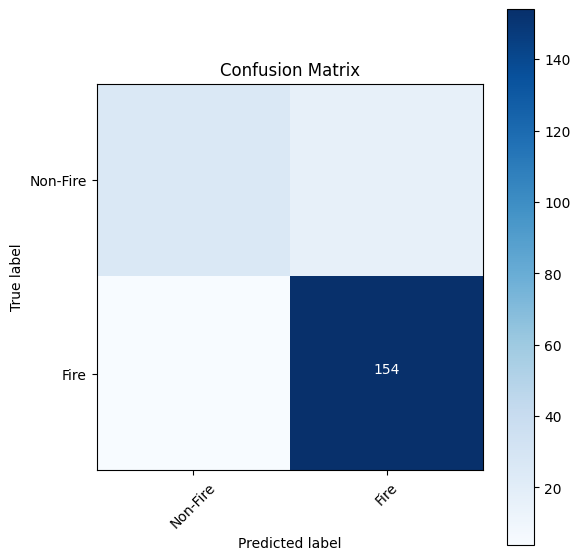

In [35]:
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split


dataset_path = '/content/drive/My Drive/archive/fire_dataset'


def load_and_preprocess_images(dataset_path, img_size=(150, 150)):
    labels = []
    images = []


    for label_dir in os.listdir(dataset_path):
        label_path = os.path.join(dataset_path, label_dir)
        if os.path.isdir(label_path):
            for img_file in os.listdir(label_path):
                img_path = os.path.join(label_path, img_file)

                img = load_img(img_path, target_size=img_size)
                img_array = img_to_array(img)
                images.append(img_array)

                label = 1 if label_dir == 'fire_images' else 0
                labels.append(label)


    images = np.array(images)
    labels = np.array(labels)


    images_flat = images.reshape(images.shape[0], -1)

    return images_flat, labels


X, y = load_and_preprocess_images(dataset_path)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Non-Fire', 'Fire']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = conf_matrix.max() / 2.
for i, j in zip(*np.where(conf_matrix > thresh)):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


In [38]:
class_report = classification_report(y_test, y_pred, target_names=['Non-Fire', 'Fire'])
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    Non-Fire       0.88      0.88      0.88        42
        Fire       0.97      0.97      0.97       158

    accuracy                           0.95       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.95      0.95      0.95       200



# **MODEL 3 (LOGISTIC REGRESSION)**

Accuracy: 95.00%
Confusion Matrix:
[[ 37   5]
 [  5 153]]


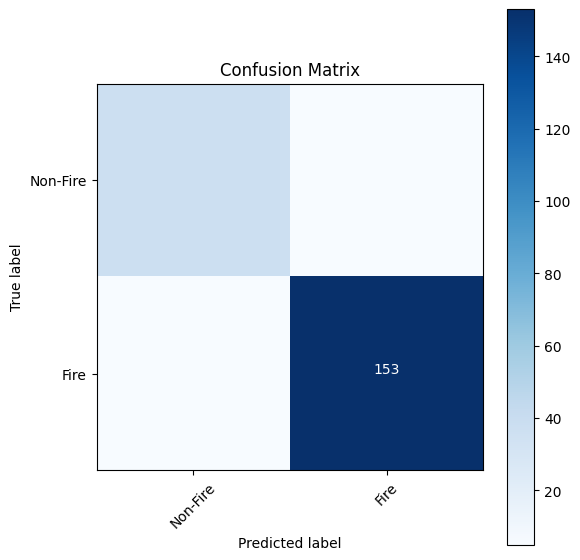

In [36]:
import os
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

dataset_path = '/content/drive/My Drive/archive/fire_dataset'


def load_and_preprocess_images(dataset_path, img_size=(150, 150)):
    labels = []
    images = []

    for label_dir in os.listdir(dataset_path):
        label_path = os.path.join(dataset_path, label_dir)
        if os.path.isdir(label_path):
            for img_file in os.listdir(label_path):
                img_path = os.path.join(label_path, img_file)

                img = load_img(img_path, target_size=img_size)
                img_array = img_to_array(img)
                images.append(img_array)

                label = 1 if label_dir == 'fire_images' else 0
                labels.append(label)


    images = np.array(images)
    labels = np.array(labels)


    images_flat = images.reshape(images.shape[0], -1)

    return images_flat, labels


X, y = load_and_preprocess_images(dataset_path)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


log_reg_classifier = LogisticRegression(max_iter=1000)

log_reg_classifier.fit(X_train, y_train)


y_pred = log_reg_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Non-Fire', 'Fire']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)


thresh = conf_matrix.max() / 2.
for i, j in zip(*np.where(conf_matrix > thresh)):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


In [37]:
class_report = classification_report(y_test, y_pred, target_names=['Non-Fire', 'Fire'])
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    Non-Fire       0.88      0.88      0.88        42
        Fire       0.97      0.97      0.97       158

    accuracy                           0.95       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.95      0.95      0.95       200



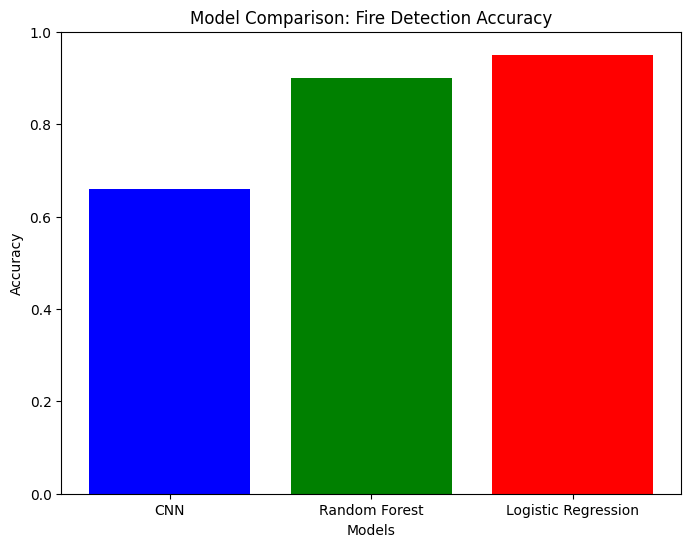

In [40]:


import matplotlib.pyplot as plt

cnn_accuracy = 0.66
rf_accuracy = 0.90
lr_accuracy = 0.95


models = ['CNN', 'Random Forest', 'Logistic Regression']
accuracies = [cnn_accuracy, rf_accuracy, lr_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.title('Model Comparison: Fire Detection Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
plt.show()